# Welcome to My Notebook!

Hello and welcome! Thank you for taking the time to explore this notebook. In this notebook, I will walk you through [briefly explain the content or goal of your notebook]. 

If you find this notebook helpful or insightful, I would truly appreciate it if you could give an upvote! Your support helps others discover useful content and motivates me to create more.

## Content

Hello and welcome! In this notebook, I will guide you through the process of analyzing and predicting heart disease using a dataset containing key features related to heart health. The goal of this notebook is to build a machine learning model that can predict the likelihood of heart disease based on various input features such as age, blood pressure, cholesterol levels, and more.

Throughout this notebook, we will:
- Explore and preprocess the dataset
- Perform exploratory data analysis (EDA) to uncover patterns and insights
- Train machine learning models for heart disease prediction
- Evaluate and fine-tune the model to improve accuracy

In [85]:
!pip install plotly

#imports
#data management
import pandas as pd
import numpy as np
#model selection
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
#visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
#ML algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
#extra
import warnings
warnings.filterwarnings("ignore")



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
#load data
db = pd.read_csv("heart2.csv")
#we will use copy of our data for visualization and analysis
db_copy = db.copy()

<a id =1></a>
# Exploratory Analysis

In [87]:
#fist 5 samples
db.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [88]:
#info
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


<font color = #8B0000>
As it can be seen we have no null values
</font>

In [89]:
#statistic informations
db.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


<font color = #8B0000>
We will normalize the data to get more accurate score</br>
Normalizing means fitting our data into 0 and 1 </br>
We will talk more about it later</br>
</font>

In [90]:
db['ChestPainType'].unique

<bound method Series.unique of 0      ATA
1      NAP
2      ATA
3      ASY
4      NAP
      ... 
913     TA
914    ASY
915    ASY
916    ATA
917    NAP
Name: ChestPainType, Length: 918, dtype: object>

In [91]:
#value counts of categorical features
categoricalfeatures = ["ChestPainType","RestingECG","Sex","ExerciseAngina","ST_Slope"]
for i in categoricalfeatures:
    print(db[i].value_counts())
    print("***************************")
    

ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
***************************
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
***************************
Sex
M    725
F    193
Name: count, dtype: int64
***************************
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
***************************
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
***************************


### İntroduction of all features

| Feature          | Description                                                                                   |
|------------------|-----------------------------------------------------------------------------------------------|
| **Age**          | Age of the patient [years]                                                                    |
| **Sex**          | Sex of the patient [M: Male, F: Female]                                                       |
| **ChestPainType**| Chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] |
| **RestingBP**    | Resting blood pressure [mm Hg]                                                                |
| **Cholesterol**  | Serum cholesterol [mm/dl]                                                                     |
| **FastingBS**    | Fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]                               |
| **RestingECG**   | Resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria] |
| **MaxHR**        | Maximum heart rate achieved [Numeric value between 60 and 202]                                |
| **ExerciseAngina**| Exercise-induced angina [Y: Yes, N: No]                                                      |
| **Oldpeak**      | Oldpeak = ST depression [Numeric value measured in depression]                                |
| **ST_Slope**     | The slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]      |
| **HeartDisease** | Output class [1: heart disease, 0: Normal]                                                   |


## Multivariate Analysis

### MaxHr - Age

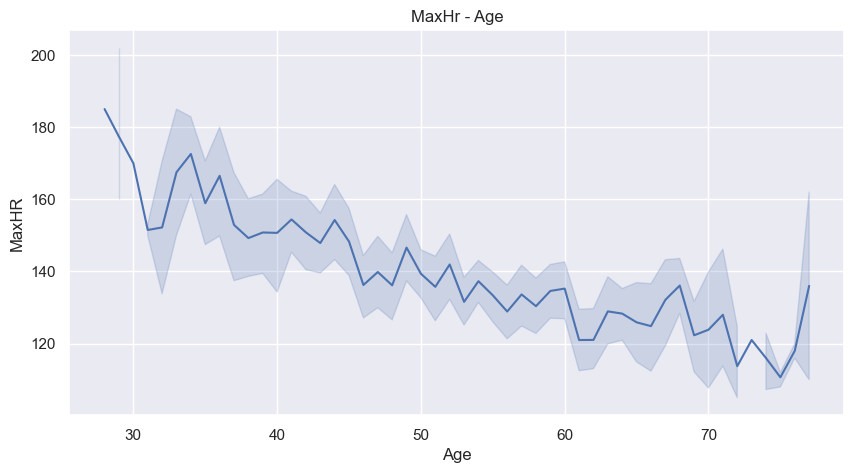

In [92]:
sns.lineplot(db_copy , x = "Age" , y = "MaxHR")
plt.title("MaxHr - Age")
plt.show()

### 

<font color = red>Which means younger people have more MaxHR rate than older people</font>


### RestingBP - Cholesterol

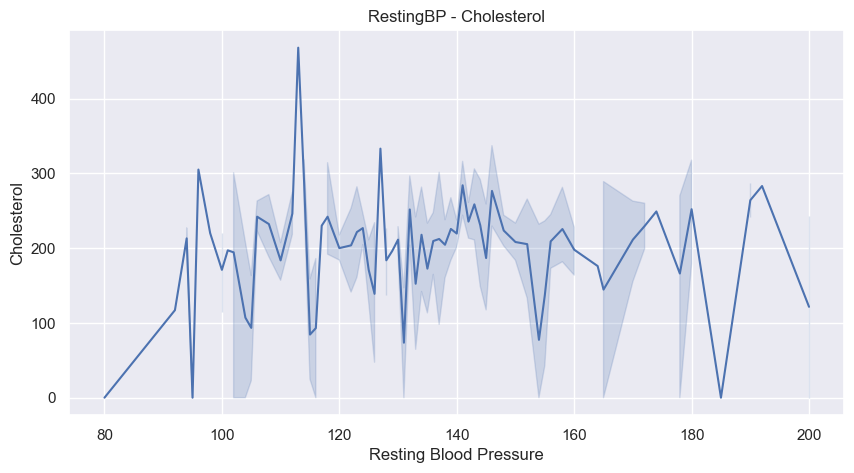

In [93]:
restingbp = [None if each == 0 else each for each in db_copy["RestingBP"]]
sns.lineplot(db_copy , x = restingbp , y = "Cholesterol")
plt.xlabel("Resting Blood Pressure")
plt.title("RestingBP - Cholesterol")
plt.show()


<font color = red>It seems restingbp has nothing to do with cholestorol</font>


### RestingBP - Age

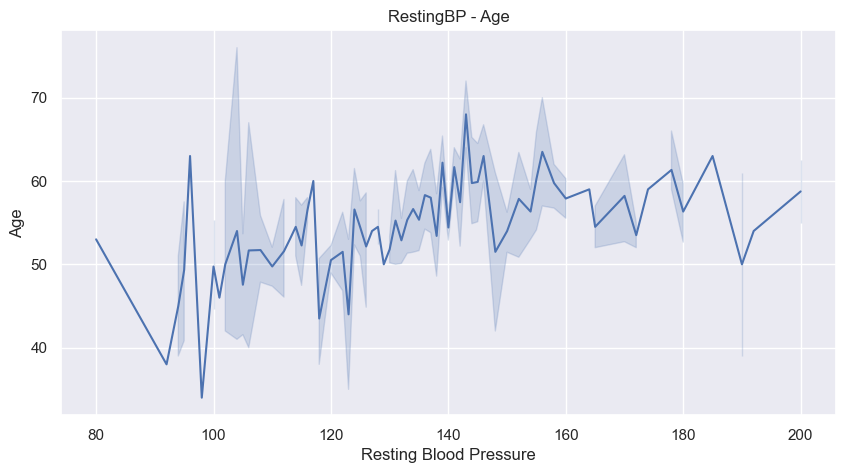

In [94]:
sns.lineplot(db_copy , x = restingbp , y = "Age")
plt.xlabel("Resting Blood Pressure")
plt.title("RestingBP - Age")
plt.show()


<font color = red>It seems that as age increases, resting blood pressure also increases.</font>

<a id =2></a>
# Visualization

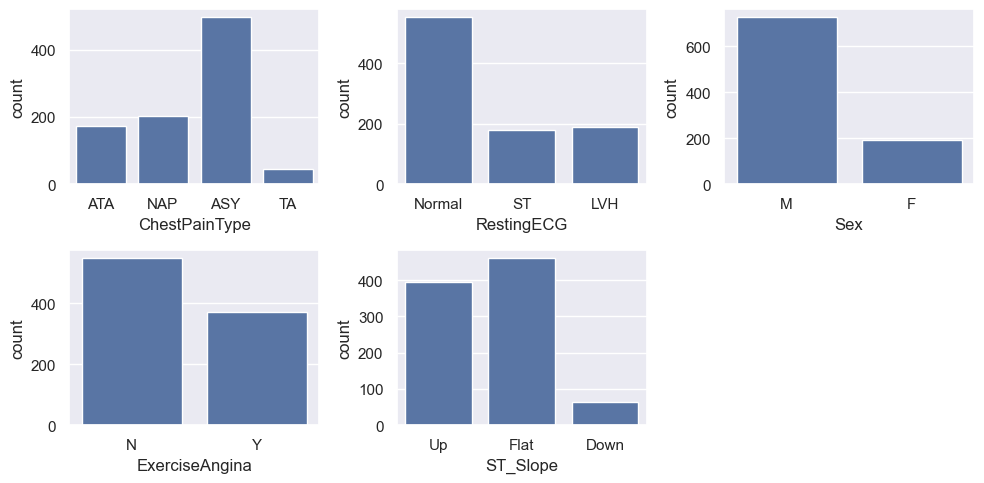

In [95]:
categoricalfeatures = ["ChestPainType","RestingECG","Sex","ExerciseAngina","ST_Slope"]
for i in categoricalfeatures:
    ax = plt.subplot(2,3,categoricalfeatures.index(i)+1)
    sns.countplot(x= db_copy[i])
    plt.tight_layout()
plt.show()
    

<font color = #8B0000>
As it can be seen number of males is much bigger than number of females</br>
Lets see how much these features effect HeartDisease risk
</font>


### The degree to which different categorical features contribute to heart attack risk.

In [96]:
#Sex
maleHeartDiseaseRate = db_copy[(db_copy["Sex"] == "M") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["Sex"] == "M"].shape[0]
femaleHeartDiseaseRate = db_copy[(db_copy["Sex"] == "F") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["Sex"] == "F"].shape[0]
#chestpaintype
ataChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "ATA") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "ATA"].shape[0]
napChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "NAP") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "NAP"].shape[0]
asyChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "ASY") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "ASY"].shape[0]
taChestPainTypeHeartDiseaseRate = db_copy[(db_copy["ChestPainType"] == "TA") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ChestPainType"] == "TA"].shape[0]
#restingecg
normalRestingEcgRate = db_copy[(db_copy["RestingECG"] == "Normal") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["RestingECG"] == "Normal"].shape[0]
stRestingEcgRate = db_copy[(db_copy["RestingECG"] == "ST") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["RestingECG"] == "ST"].shape[0]
lvhRestingEcgRate = db_copy[(db_copy["RestingECG"] == "LVH") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["RestingECG"] == "LVH"].shape[0]
#ExerciseAngina
NExerciseAnginaRate = db_copy[(db_copy["ExerciseAngina"] == "N") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ExerciseAngina"] == "N"].shape[0]
YExerciseAnginaRate= db_copy[(db_copy["ExerciseAngina"] == "Y") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ExerciseAngina"] == "Y"].shape[0]
#ST_Slope
upStSlopeRate=db_copy[(db_copy["ST_Slope"] == "Up") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ST_Slope"] == "Up"].shape[0]
flatStSlopeRate=db_copy[(db_copy["ST_Slope"] == "Flat") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ST_Slope"] == "Flat"].shape[0]
downStSlopeRate=db_copy[(db_copy["ST_Slope"] == "Down") & (db_copy["HeartDisease"] == 1)].shape[0]/db_copy[db_copy["ST_Slope"] == "Down"].shape[0]

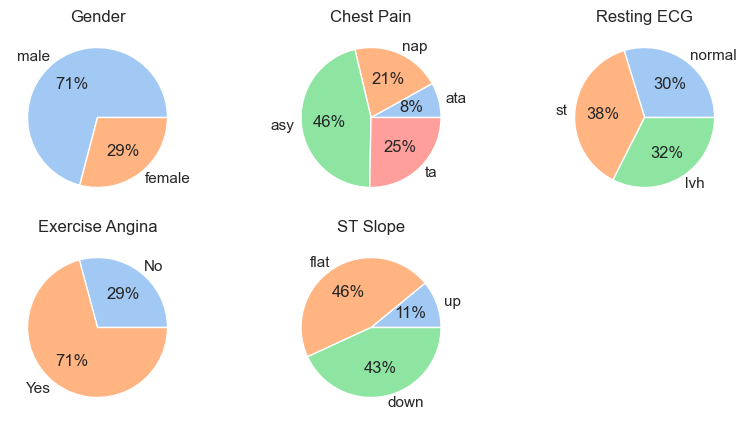

In [97]:
#Visualization
#rates
genderrate = [maleHeartDiseaseRate,femaleHeartDiseaseRate]
chestpaintyperate = [ataChestPainTypeHeartDiseaseRate,napChestPainTypeHeartDiseaseRate,asyChestPainTypeHeartDiseaseRate,taChestPainTypeHeartDiseaseRate]
restingecgrate = [normalRestingEcgRate,stRestingEcgRate,lvhRestingEcgRate]
exerciseAnginarate = [NExerciseAnginaRate,YExerciseAnginaRate]
stsloperate = [upStSlopeRate,flatStSlopeRate,downStSlopeRate]
rates = [genderrate,chestpaintyperate,restingecgrate,exerciseAnginarate,stsloperate]
#labels
genderlabels = ["male", "female"]
chestpainlabels = ["ata","nap","asy","ta"]
restingecglabels = ["normal","st","lvh"]
exerciseAnginalabels = ["No" , "Yes"]
stslopelabels = ["up","flat","down"]
labels = [genderlabels,chestpainlabels,restingecglabels,exerciseAnginalabels,stslopelabels]
titles = ["Gender","Chest Pain" , "Resting ECG" , "Exercise Angina" , "ST Slope"]


for i in range(0,5):
    plt.subplot(2, 3,i+1)
    plt.title(titles[i])
    plt.pie(rates[i],labels = labels[i],autopct='%.0f%%',colors = sns.color_palette("pastel"))



Results:
1. Males have bigger change to get heart disease
2. Those who have Asymptomatic (asy) have bigger change to get heart disease
3. Resting ecg values are close to each other so we dont have to think about it
4. Those with exercise-induced angina are at a significantly higher risk of having heart disease.
5. The higher heart disease rates in the ST slope down and ST slope flat categories compared to ST slope up are likely due to the greater number of individuals with chronic conditions like ischemia or coronary artery disease (CAD), which are more common. ST slope up typically indicates acute conditions like STEMI, which are less frequent and treated quickly, leading to a lower heart disease rate in this group.

### The degree to which different continuous features contribute to heart attack risk.

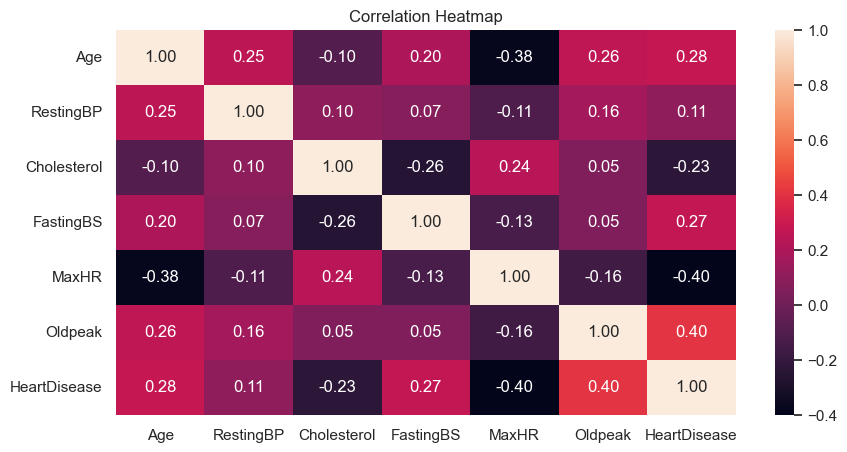

In [98]:
corrdb = db_copy.loc[:,["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak","HeartDisease"]]
sns.heatmap(corrdb.corr(),fmt = ".2f",annot = True)
plt.title("Correlation Heatmap")
plt.show()

## Visualization of most correlated features

### MaxHR - Age

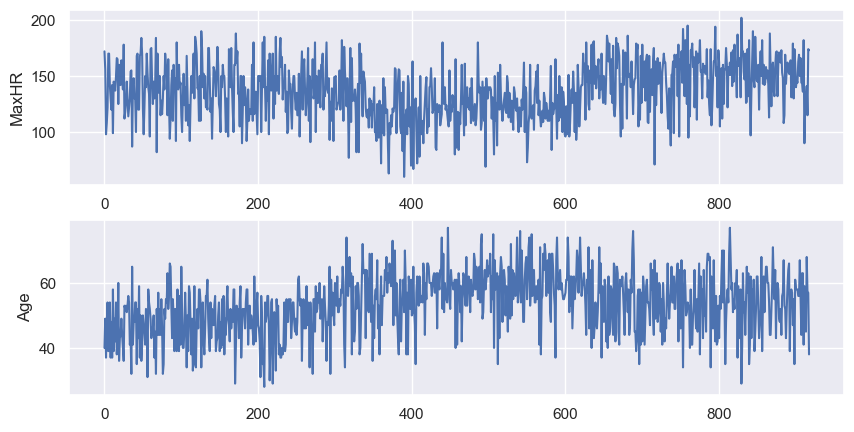

In [99]:
plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(10, 10)})
sns.lineplot(db_copy["MaxHR"])
plt.subplot(2,1,2)
sns.lineplot(db_copy["Age"])
plt.show()

<font color = red>As it can be seen when Age decreases MaxHr increases vice versa</font>


### MaxHR - Cholesterol


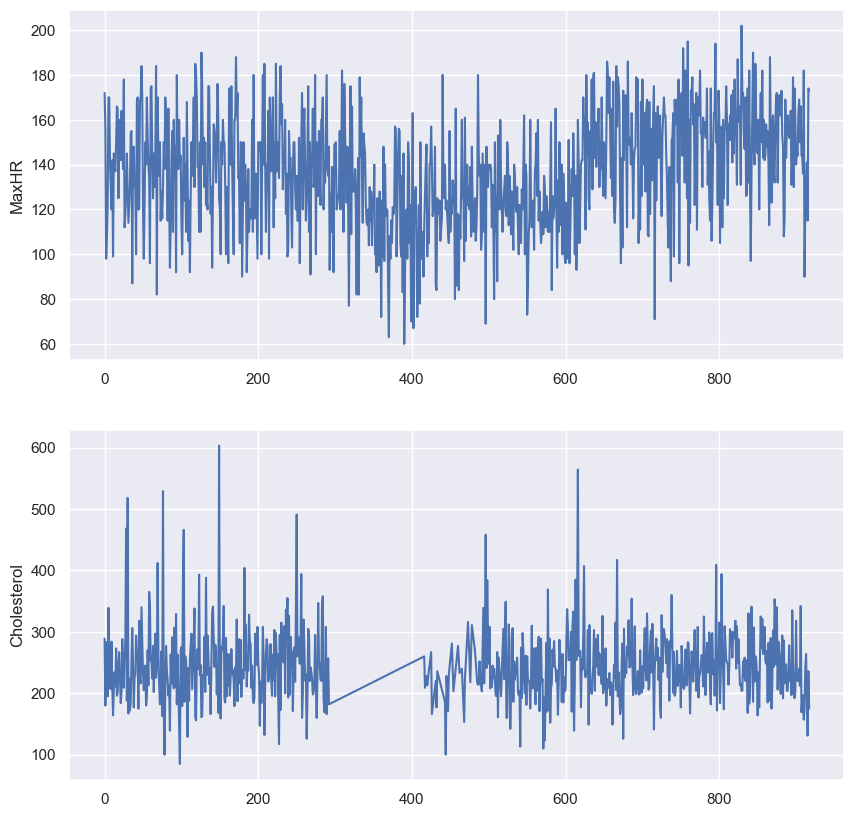

In [100]:
cholesterol = db_copy[db_copy["Cholesterol"] !=0]["Cholesterol"]
plt.subplot(2,1,1)
sns.set(rc={'figure.figsize':(10, 5)})
sns.lineplot(db_copy["MaxHR"])
plt.subplot(2,1,2)
sns.lineplot(cholesterol)
plt.show()

# Feature Engineering

##

In [101]:
#Split data
y_db = db.loc[:,"HeartDisease"]
db.drop("HeartDisease",inplace = True,axis = 1)
x_db = db

In [102]:
x_db

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


## Normalizing

> Normalizing features ensures that all variables have the same scale, improving model performance, convergence speed, and accuracy, especially for algorithms sensitive to feature magnitude differences.


In [103]:
featurelist = ["Age","RestingBP","Cholesterol","FastingBS","MaxHR","Oldpeak"]
for i in featurelist:
    x_db[i] = [ (each - np.min(x_db[i])) / (np.max(x_db[i])-np.min(x_db[i]))   for each in x_db[i]]

## Label Encoding

> One-Hot Encoding is a technique that converts categorical variables into a series of binary columns, where each column represents one category, with 1 indicating the presence of that category and 0 otherwise.



> One-Hot Encoding converts each category into a separate binary column, while Label Encoding assigns a unique integer to each category; One-Hot Encoding is typically used for nominal data, and Label Encoding for ordinal data.


In [104]:
x_db = pd.get_dummies(x_db , columns = ["ChestPainType","RestingECG","Sex","ExerciseAngina","ST_Slope"],dtype = int)

In [105]:
#our new database
x_db

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,Sex_F,Sex_M,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.0,0.788732,0.295455,0,1,0,0,0,1,0,0,1,1,0,0,0,1
1,0.428571,0.80,0.298507,0.0,0.676056,0.409091,0,0,1,0,0,1,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.0,0.267606,0.295455,0,1,0,0,0,0,1,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.0,0.338028,0.465909,1,0,0,0,0,1,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.0,0.436620,0.295455,0,0,1,0,0,1,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,0.346939,0.55,0.437811,0.0,0.507042,0.431818,0,0,0,1,0,1,0,0,1,1,0,0,1,0
914,0.816327,0.72,0.320066,1.0,0.570423,0.681818,1,0,0,0,0,1,0,0,1,1,0,0,1,0
915,0.591837,0.65,0.217247,0.0,0.387324,0.431818,1,0,0,0,0,1,0,0,1,0,1,0,1,0
916,0.591837,0.65,0.391376,0.0,0.802817,0.295455,0,1,0,0,1,0,0,1,0,1,0,0,1,0


# Prediction


In [106]:
#train-test split
x_train , x_test , y_train , y_test = train_test_split(x_db , y_db)

In [107]:
#with train-test split
logreg = LogisticRegression()
gaussiannb = GaussianNB()
dectree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svm = SVC()
knearest = KNeighborsClassifier()
labelList = ["LogReg : " , "GaussianNb : " , "DecTree : ","RandomForest : ","Svm : " , "knearest : "]
classifierList = [logreg , gaussiannb , dectree , randomforest , svm,knearest]
for i in range(0,6):
    classifier = classifierList[i]
    classifier.fit(x_train , y_train)
    print("Score of" ,labelList[i] , classifier.score(x_test,y_test))

Score of LogReg :  0.8608695652173913
Score of GaussianNb :  0.8130434782608695
Score of DecTree :  0.808695652173913
Score of RandomForest :  0.8434782608695652
Score of Svm :  0.8391304347826087
Score of knearest :  0.8173913043478261


Actually these scores are going to decrease when working with real data

In [108]:
#Cross validation
logreg = LogisticRegression()
gaussiannb = GaussianNB()
dectree = DecisionTreeClassifier()
randomforest = RandomForestClassifier()
svm = SVC()
knearest = KNeighborsClassifier()
labelList = ["LogReg : " , "GaussianNb : " , "DecTree : ","RandomForest : ","Svm : ", "knearest : "]
classifierList = [logreg , gaussiannb , dectree , randomforest , svm,knearest]
for i in range(0,6):
    classifier = classifierList[i]
    classifier.fit(x_train , y_train)
    scores = cross_val_score(classifier, x_train , y_train,n_jobs = 5)
    print("Score of" ,labelList[i] , np.mean(scores))

Score of LogReg :  0.8589442505024859
Score of GaussianNb :  0.8662329419231989
Score of DecTree :  0.7906907859938644
Score of RandomForest :  0.8735427906484714
Score of Svm :  0.8692055432137945
Score of knearest :  0.857569025706125


As it can be seen cross-validation-score are lower than train-test split score

In [109]:
#HyperParameterTuning
params = [
    
     {
         #logisticregression
        "C" : [0.01 , 0.1 , 1 , 10 , 100],
        "max_iter" : [100 , 150 , 200],
        "penalty" : ["l1" , "l2"],
        "solver" : ["lbfgs", "liblinear", "newton-cg"],
    },
    
    {
        #decisiontree
        "min_samples_leaf" : [1 , 5 , 10],
        "min_samples_split" : [3 , 5 , 10 , 20],
        "criterion" : ["gini" , "entropy"],
        },
    {
        #randomforest
    # cause it takes too much time to try all the different parameter options I used the 
    # most accurate parameters that I found
       'criterion': ['entropy'],
         'min_samples_split': [20],
         'n_estimators': [50],
        
    },
    #naive - bayes
    {
        "var_smoothing" : [1e-9 , 1e-8 , 1e-7]
    } ,
    #knearest
    {
        "n_neighbors":[3,5,10,20,30],
    "weights":["uniform","distance"],
    "metric":["eucladian","manhattan"],
    },
#svc
{
                    "C":[1,10,50,300,500],
                  "gamma":[0.1,0.01,0.001,0.0001,1],
    
},
]

In [110]:
X_train,X_val,Y_train,Y_val = train_test_split(x_train,y_train)
logreg = LogisticRegression()
dectree = DecisionTreeClassifier()
randforest = RandomForestClassifier()
gaussiannb = GaussianNB()
knearest = KNeighborsClassifier()
svc = SVC()
modellist = {
   'logreg': logreg,
 'dectree': dectree,
 'randforest': randforest,
 'gaussiannb': gaussiannb,
 'knearest': knearest,
 'svc': svc,}
i = 0
for key , value in modellist.items():
   clf = GridSearchCV(value , params[i])
   clf.fit(X_train,Y_train)
   print(key,": ", clf.score(X_val,Y_val)) 
   i+=1

logreg :  0.877906976744186
dectree :  0.8255813953488372
randforest :  0.8662790697674418
gaussiannb :  0.8837209302325582
knearest :  0.8837209302325582
svc :  0.8604651162790697


<font color ="blue">
First of all we split our train data to second train data and validation data </br>
we used validation data as test data to find best parameters
</font>

Sklearn cross validation doc: https://scikit-learn.org/1.5/modules/cross_validation.html

<font color = "blue">
Cross validation score of our models with real test data
</font>

In [111]:
i = 0
for key , value in modellist.items():
   clf = GridSearchCV(value , params[i])
   clf.fit(X_train,Y_train)
   print(key,": ", clf.score(x_test,y_test)) 
   i+=1

logreg :  0.8391304347826087
dectree :  0.7956521739130434
randforest :  0.8434782608695652
gaussiannb :  0.8130434782608695
knearest :  0.8565217391304348
svc :  0.8304347826086956


## Prediction with artifical neural networks

<font color = "blue">We are gonna use keras </br> Keras Documents : https://keras.io/api/ </font>

In [112]:
!pip install tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.optimizers import Adam
model = Sequential()
model.add(Input(shape = (20,))) #we have 20 features thats why our input layer has 20 neurons
model.add(Dense(activation = "relu" , units = 32))
model.add(Dense(activation = "relu" , units = 32))
model.add(Dense(activation = "relu" , units = 8))
model.add(Dense(activation = "softmax" , units = 2))
model.compile(metrics = ["accuracy"] , optimizer = Adam(learning_rate = 0.0001) , loss = "sparse_categorical_crossentropy")
our_model = model.fit(x = x_train , y = y_train , batch_size = 30 , epochs = 200 ,shuffle = True , verbose = 2,validation_data=(x_test, y_test))




Epoch 1/200



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


23/23 - 1s - 46ms/step - accuracy: 0.5552 - loss: 0.6847 - val_accuracy: 0.5478 - val_loss: 0.6854
Epoch 2/200
23/23 - 0s - 3ms/step - accuracy: 0.5552 - loss: 0.6679 - val_accuracy: 0.5478 - val_loss: 0.6709
Epoch 3/200
23/23 - 0s - 3ms/step - accuracy: 0.5552 - loss: 0.6517 - val_accuracy: 0.5478 - val_loss: 0.6563
Epoch 4/200
23/23 - 0s - 3ms/step - accuracy: 0.5552 - loss: 0.6351 - val_accuracy: 0.5478 - val_loss: 0.6411
Epoch 5/200
23/23 - 0s - 3ms/step - accuracy: 0.5552 - loss: 0.6182 - val_accuracy: 0.5478 - val_loss: 0.6262
Epoch 6/200
23/23 - 0s - 3ms/step - accuracy: 0.5552 - loss: 0.6021 - val_accuracy: 0.5478 - val_loss: 0.6133
Epoch 7/200
23/23 - 0s - 3ms/step - accuracy: 0.5552 - loss: 0.5879 - val_accuracy: 0.5478 - val_loss: 0.6024
Epoch 8/200
23/23 - 0s - 3ms/step - accuracy: 0.5567 - loss: 0.5751 - val_accuracy: 0.5522 - val_loss: 0.5927
Epoch 9/200
23/23 - 0s - 3ms/step - accuracy: 0.5596 - loss: 0.5635 - val_accuracy: 0.5522 - val_loss: 0.5844
Epoch 10/200
23/23 - 

In [113]:
# Save the model in SavedModel format
model.save('my_model.keras')


<h3>With thousand iteration we can get %93 acc rate but we dont know that our data is overfitted to train data</br>
</br>
To learn it:</h3>

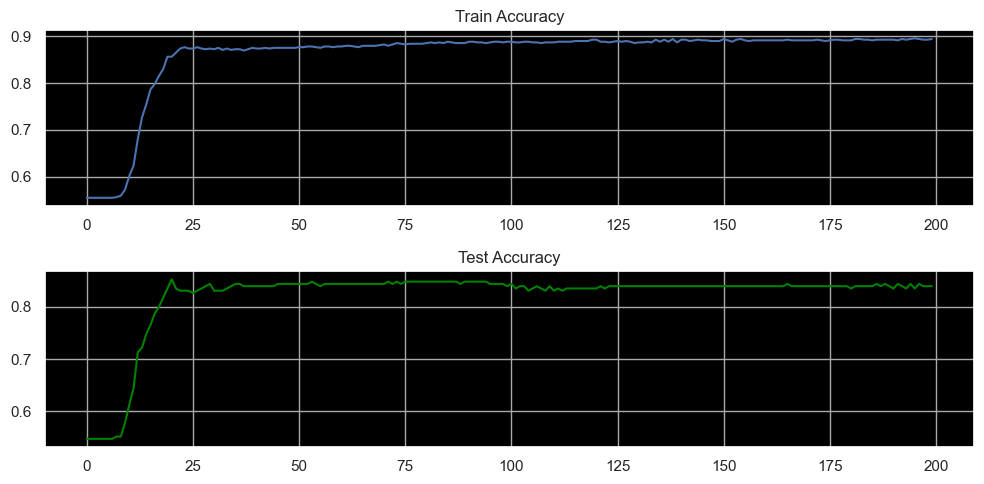

In [114]:
train_acc = our_model.history["accuracy"]
test_acc = our_model.history["val_accuracy"]

#first plot
plt.subplot(2,1,1)
plt.title("Train Accuracy")
plt.plot(train_acc)
ax1 = plt.gca()
ax1.set_facecolor('black') 
ax1.grid(True , color = "#A9A9A9")
#second plot
plt.subplot(2,1,2)
plt.title("Test Accuracy")
plt.plot(test_acc,color = "green")
ax2 = plt.gca()
ax2.set_facecolor('black') 
ax2.grid(True , color = "#A9A9A9")


plt.tight_layout()
plt.show()

<font color = "blue">
<h4>
If the train accuracy was increasing while the test accuracy was decreasing, we could have said that our model was overfitting. However, both graphs are quite similar, and as we can see, after approximately 100 epochs, there was almost no further improvement in the graph, which indicates that 1000 epochs would have been unnecessary.
    
</h4>
</font

## Thank You for Reading!

I sincerely appreciate your time and attention while going through this notebook. I hope you found the content helpful and insightful. If you have any questions or feedback, feel free to reach out!

Happy learning and coding! 🚀


In [115]:
print(model.input_shape)


(None, 20)


In [116]:
!pip install shap



[notice] A new release of pip is available: 24.2 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [117]:
import shap
import numpy as np
import matplotlib.pyplot as plt


In [118]:
# Verify prediction shape
preds = model.predict(x_test)
print(preds.shape)


8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
(230, 2)


In [134]:
import shap
import numpy as np

# Correct background data
background = x_train.sample(100, random_state=42).values  # 100 random samples

# Initialize SHAP DeepExplainer
explainer = shap.DeepExplainer(model, background)

# Compute SHAP values for the full test set
shap_values = explainer.shap_values(x_test.values)

# Check SHAP values shape
print(f'SHAP values shape: {np.array(shap_values).shape}')


SHAP values shape: (230, 20, 2)


In [135]:
print(f"SHAP values shape: {shap_values[0].shape}")
print(f"x_test shape: {x_test.shape}")


SHAP values shape: (20, 2)
x_test shape: (230, 20)


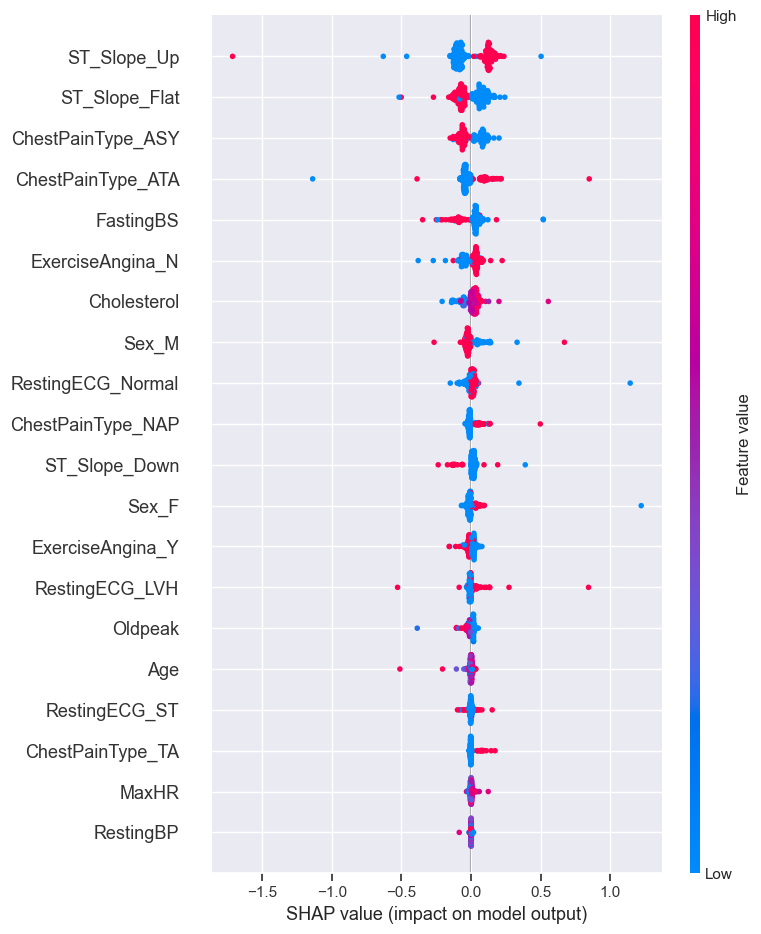

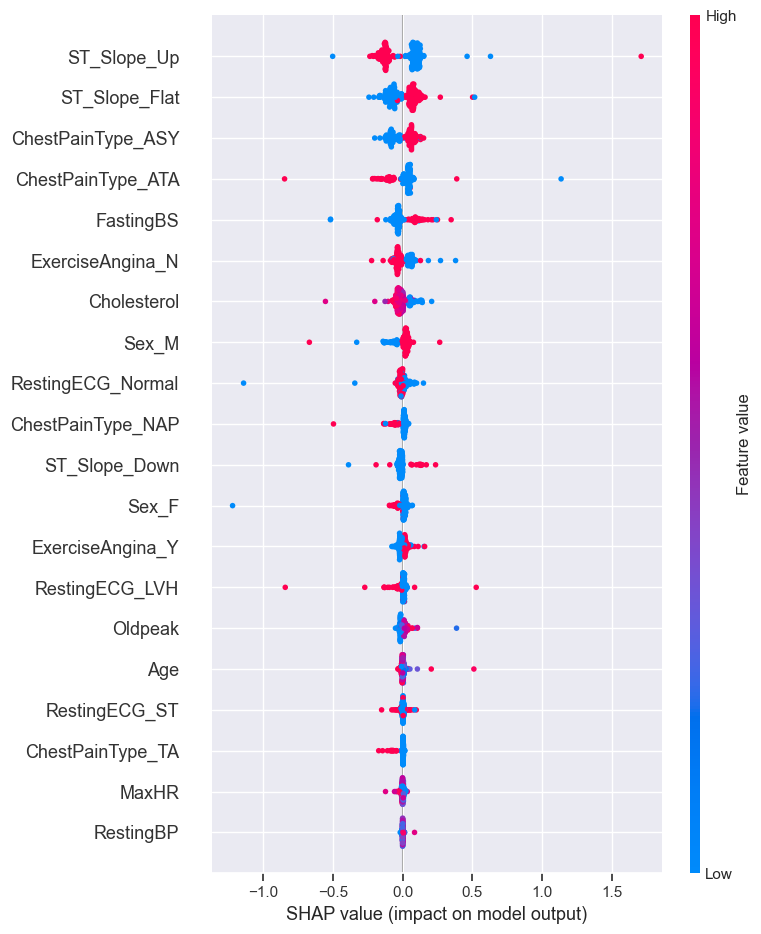

In [136]:
# Use actual column names from x_test
feature_names = x_test.columns.tolist()

# Summary plot for Class 0
shap.summary_plot(shap_values[:, :, 0], x_test, feature_names=feature_names)

# Summary plot for Class 1
shap.summary_plot(shap_values[:, :, 1], x_test, feature_names=feature_names)


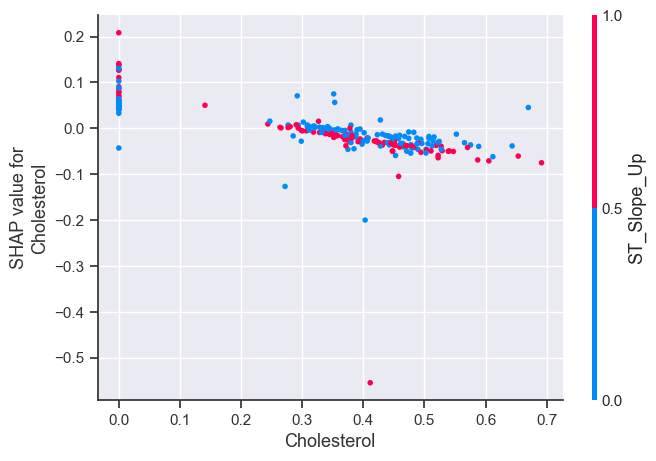

In [137]:
# For a specific feature, e.g., 'feature_0'
shap.dependence_plot('Cholesterol', shap_values[:, :, 1], x_test, feature_names=feature_names)

  

In [138]:
import shap
import numpy as np

# Convert expected_value to NumPy if it's a Tensor
base_value = explainer.expected_value[1]
if hasattr(base_value, 'numpy'):
    base_value = base_value.numpy()  # Convert TensorFlow tensor to NumPy

# Convert SHAP values to NumPy if they're tensors
shap_vals = shap_values[0, :, 1]
if hasattr(shap_vals, 'numpy'):
    shap_vals = shap_vals.numpy()  # Convert TensorFlow tensor to NumPy

# Convert input data to NumPy
input_data = x_test.iloc[0].to_numpy()

# Initialize JavaScript visualization
shap.initjs()

# Force Plot
shap.force_plot(base_value, shap_vals, input_data, feature_names=feature_names)


SHAP Values Shape: (230, 20, 2)
x_test Shape: (230, 20)


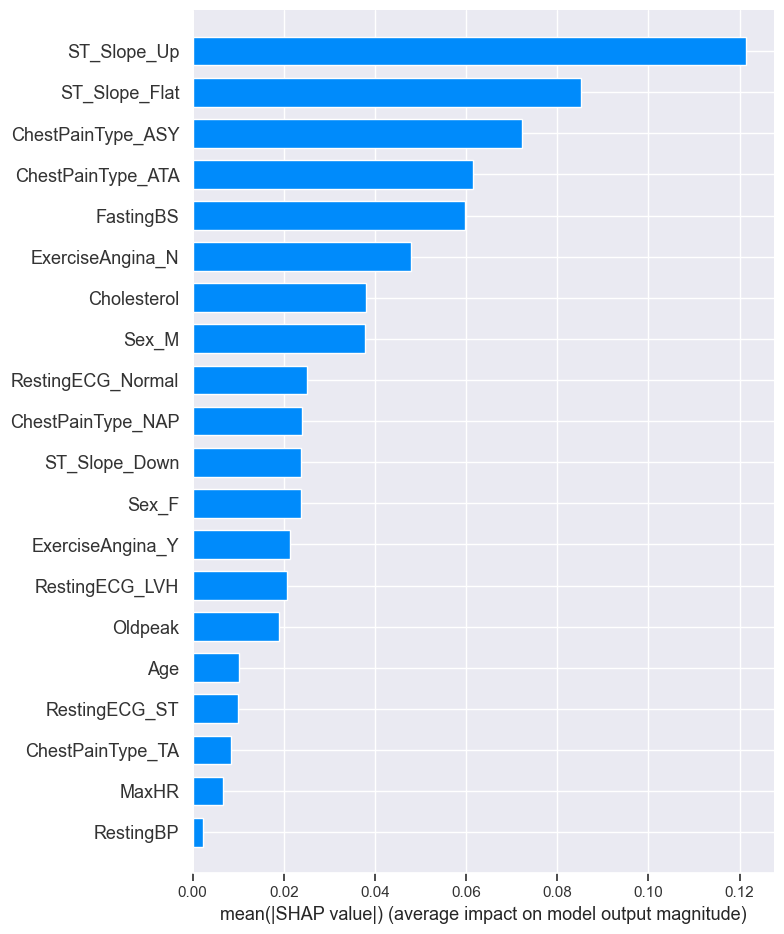

In [139]:
import shap
import numpy as np

# Check shapes before proceeding
print("SHAP Values Shape:", np.array(shap_values).shape)
print("x_test Shape:", x_test.shape)

# If classification, select one class
if len(np.array(shap_values).shape) == 3:  
    class_index = 1  # Change if needed
    shap_values = shap_values[:, :, class_index]

# Ensure shape matches
shap_values = np.array(shap_values)

# Plot summary (bar chart)
shap.summary_plot(shap_values, x_test, plot_type="bar")


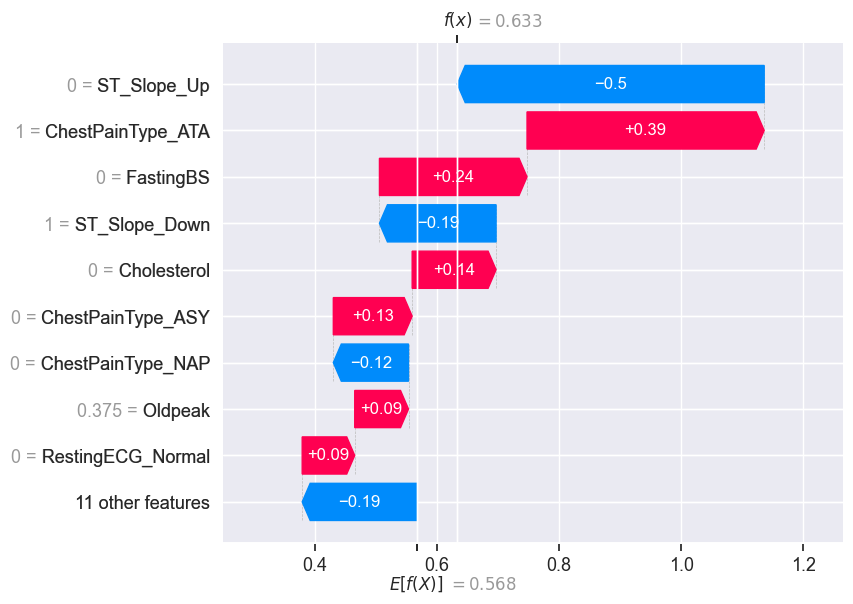

In [142]:
import shap

# Ensure expected_value is a scalar
base_value = explainer.expected_value[1]
if hasattr(base_value, 'numpy'):
    base_value = base_value.numpy()  # Convert to NumPy if it's a tensor

# Waterfall Plot for the first sample (Class 1)
shap.waterfall_plot(shap.Explanation(
    values=shap_values[0],
    base_values=base_value,
    data=x_test.iloc[0],
    feature_names=feature_names
))


In [141]:
import joblib
joblib.dump((x_train, x_test), 'notebook_data.pkl')


['notebook_data.pkl']